In [2]:
## 필요한 패키지를 불러옵니다.
import os
import pandas as pd

In [3]:
## 경로설정을 해줍니다.
os.chdir(r'C:\Users\spoon\OneDrive\문서\러닝스푼즈\data\rossmann')
## 위의 경로설정은 제 컴퓨터를 기준으로 입력한 것으로 각자 데이터를 저장한 위치에 맞게 바꿔주시기 바랍니다.
## 데이터를 다운받으시기 위해서는 아래 링크로 들어가시기 바랍니다.

https://www.kaggle.com/c/lspoons-rossman/data

In [7]:
## 데이터를 불러옵니다.
train = pd.read_csv("lspoons_train.csv")
test = pd.read_csv("lspoons_test.csv")
store = pd.read_csv("store.csv")
## 실습 데이터는 러닝스푼즈 홈페이지에서도 다운받으실 수 있습니다.

# 1. StateHoliday 변수 변환

In [8]:
## StateHoliday 변수를 get_dummies 함수를 통해 수치화시킵니다.(one hot encoding)
train = pd.get_dummies(columns=['StateHoliday'],data=train)
test = pd.get_dummies(columns=['StateHoliday'],data=test)

In [9]:
train.head()

,id,Store,Date,Sales,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,14929,85,2015-05-01,11360,1,0,0,1,0,0
1,14930,512,2015-05-01,10534,1,0,0,1,0,0
2,14931,1097,2015-05-01,17039,1,0,0,1,0,0
3,14932,1,2015-04-30,6228,1,0,1,0,0,0
4,14933,9,2015-04-30,9717,1,0,1,0,0,0


In [10]:
## test 데이터에는 StateHoliday가 b, 혹은 c인 경우가 없었습니다.
## 따라서 one hot encoding 시에도 StateHoliday_b,c 변수가 생성되지 않을 것입니다.
## 학습 시에 train과 test 데이터에 동일한 컬럼이 있지 않을 시 문제가 생길 수 있으므로 test 데이터에서 해당 컬럼을 따로 만들어줍니다.
test['StateHoliday_b'] = 0
test['StateHoliday_c'] = 0

# 2. Date 변수를 활용한 FE

In [11]:
## pandas에서 날짜 계산을 편리하게 하기 위하여 pd.to_datetime 함수를 통해 Date 컬럼을 날짜형 변수로 바꿔줍니다.
train['Date'] = pd.to_datetime( train['Date'] )
test['Date'] = pd.to_datetime( test['Date'] )

In [12]:
## dt.weekday를 통하여 요일을 뽑아낼 수 있습니다.
train['weekday'] = train['Date'].dt.weekday
test['weekday'] = test['Date'].dt.weekday

In [13]:
## dt.year를 통하여 년도를 뽑아낼 수 있습니다.
train['year'] = train['Date'].dt.year
test['year'] = test['Date'].dt.year

In [14]:
## dt.month를 통하여 월을 뽑아낼 수 있습니다.
train['month'] = train['Date'].dt.month
test['month'] = test['Date'].dt.month

In [15]:
train.head()

,id,Store,Date,Sales,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,weekday,year,month
0,14929,85,2015-05-01,11360,1,0,0,1,0,0,4,2015,5
1,14930,512,2015-05-01,10534,1,0,0,1,0,0,4,2015,5
2,14931,1097,2015-05-01,17039,1,0,0,1,0,0,4,2015,5
3,14932,1,2015-04-30,6228,1,0,1,0,0,0,3,2015,4
4,14933,9,2015-04-30,9717,1,0,1,0,0,0,3,2015,4


In [16]:
train[['Promo','SchoolHoliday','StateHoliday_0','StateHoliday_a','StateHoliday_b','StateHoliday_c','weekday','year','month']]

,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,weekday,year,month
0,1,0,0,1,0,0,4,2015,5
1,1,0,0,1,0,0,4,2015,5
2,1,0,0,1,0,0,4,2015,5
3,1,0,1,0,0,0,3,2015,4
4,1,0,1,0,0,0,3,2015,4
5,1,0,1,0,0,0,3,2015,4
6,1,0,1,0,0,0,3,2015,4
7,1,0,1,0,0,0,3,2015,4
8,1,0,1,0,0,0,3,2015,4
9,1,0,1,0,0,0,3,2015,4


# 3. 베이스라인 모델링

In [14]:
## xgboost를 위한 패키지를 다운받습니다.
# !pip install xgboost

In [17]:
## xgboost를 위한 패키지를 임포트합니다.
from xgboost import XGBRegressor

In [18]:
## xgboost 모델을 train 데이터에서 학습시킵니다.
xgb = XGBRegressor( n_estimators= 300 , learning_rate=0.1 , random_state=2020 )
xgb.fit(train[['Promo','SchoolHoliday','StateHoliday_0','StateHoliday_a','StateHoliday_b','StateHoliday_c','weekday','year','month']],
        train['Sales'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=300, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=2020, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [21]:
## test set에 대하여 예측을 진행합니다.
test['Sales'] = xgb.predict(test[['Promo','SchoolHoliday','StateHoliday_0','StateHoliday_a','StateHoliday_b','StateHoliday_c','weekday','year','month']])

In [22]:
## 예측된 값을 submission.csv로 만듭니다.
test[['id','Sales']].to_csv("submission.csv",index=False)

# 4. 변수선택

In [45]:
## 제작된 모델의 변수중요도를 살펴봅니다.
xgb.feature_importances_

input_var = ['Promo','SchoolHoliday','StateHoliday_0','StateHoliday_a','StateHoliday_b','StateHoliday_c','weekday','year','month']

imp_df = pd.DataFrame({"var": input_var,
                       "imp":xgb.feature_importances_})
imp_df.dtypes

var     object
imp    float32
dtype: object

In [42]:
## 중요한 변수 순서대로 나열합니다.
imp_df = imp_df.sort_values(['imp'],ascending=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

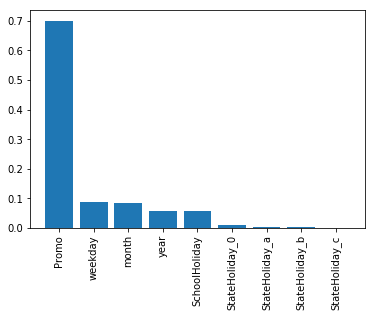

In [33]:
## 변수중요도를 시각화합니다.
import matplotlib.pyplot as plt
plt.bar(imp_df['var'],imp_df['imp'])
plt.xticks(rotation=90)

In [34]:
## cross validation 함수를 실행시켜봅니다(앞선 머신러닝 강의에서 배웠던 내용을 곱씹어보세요)
from sklearn.model_selection import cross_val_score
cross_val_score(xgb, train[input_var], train['Sales'], scoring="neg_mean_squared_error", cv=3)

array([ -7442398.68110158, -10165475.69817356,  -7896996.52747543])

In [39]:
import numpy as np
score_list=[]
selected_varnum=[]

In [46]:
## 변수중요도가 중요한 순서대로 input 변수를 늘려가며 cross validation을 실행시킵니다.
## cross validation 결과물을 score_list에 저장합니다.
for i in range(1,10):
    selected_var = imp_df['var'].iloc[:i]
    scores = cross_val_score(xgb, 
                             train[selected_var], 
                             train['Sales'], 
                             scoring="neg_mean_squared_error", cv=3)
    score_list.append(-np.mean(scores))
    selected_varnum.append(i)
    print(i)

1
2
3
4
5
6
7
8
9


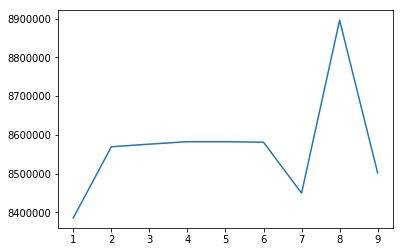

In [47]:
## 선택 변수에 따른 cross validation score를 시각화해봅니다.
plt.plot(selected_varnum, score_list)
## 공교롭게도 Promo와 weekday 딱 2개의 변수만 활용하는 것이 cross validation 결과가 가장 좋네요.

In [63]:
## input 변수를 수정해서 다시 제출파일을 만듭니다.
xgb.fit(train[['Promo','weekday']],
        train['Sales'])
test['Sales'] = xgb.predict(test[['Promo','weekday']])
test[['id','Sales']].to_csv("submission1.csv",index=False)

# 5. store 데이터 활용

In [17]:
## 이제 보조 데이터를 활용할 차례입니다. store 데이터를 merge시킵니다.
train = pd.merge(train, store, on=['Store'], how='left')
test = pd.merge(test, store, on=['Store'], how='left')

In [19]:
## 경쟁업체가 언제 개장했는지 여부를 competitionopen 변수에 저장합니다.
train['CompetitionOpen'] = 12*( train['year'] - train['CompetitionOpenSinceYear'] ) + \
                             (train['month'] - train['CompetitionOpenSinceMonth'])

test['CompetitionOpen'] = 12*( test['year'] - test['CompetitionOpenSinceYear'] ) + \
                             (test['month'] - test['CompetitionOpenSinceMonth'])

In [20]:
## dt.weekofyear 함수를 통해 몇번째 주인지를 뽑아냅니다.
train['WeekOfYear'] = train['Date'].dt.weekofyear
test['WeekOfYear'] = test['Date'].dt.weekofyear

In [21]:
## 프로모션이 시작된지 얼마나 되었는지를 promoopen 변수에 저장합니다.
train['PromoOpen'] = 12* ( train['year'] - train['Promo2SinceYear'] ) + \
                        (train['WeekOfYear'] - train['Promo2SinceWeek']) / 4

test['PromoOpen'] = 12* ( test['year'] - test['Promo2SinceYear'] ) + \
                        (test['WeekOfYear'] - test['Promo2SinceWeek']) / 4

In [22]:
## StoreType 변수를 one hot encoding합니다.
train = pd.get_dummies(columns=['StoreType'],data=train)
test = pd.get_dummies(columns=['StoreType'],data=test)

In [23]:
## Assortment 변수를 one hot encoding합니다.
train = pd.get_dummies(columns=['Assortment'],data=train)
test = pd.get_dummies(columns=['Assortment'],data=test)

In [24]:
## PromoInterval 변수를 one hot encoding합니다.
train = pd.get_dummies(columns=['PromoInterval'],data=train)
test = pd.get_dummies(columns=['PromoInterval'],data=test)

# 6. 2차 모델링

In [26]:
## 2차 모델링을 위한 input 변수를 지정합니다.
input_var = ['Promo', 'SchoolHoliday',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'weekday', 'year', 'month', 'CompetitionDistance',
       'Promo2',
       'CompetitionOpen', 'WeekOfYear',
       'PromoOpen', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec']

In [28]:
## 지정한 input 변수로 xgb 모델을 학습시킵니다.
xgb = XGBRegressor( n_estimators=300, learning_rate= 0.1, random_state=2020)
xgb.fit(train[input_var],train['Sales'])

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=2020, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [29]:
## 학습된 모델에서 변수중요도를 뽑아 imp_df라는 데이터프레임으로 저장시킵니다. 
imp_df = pd.DataFrame({'var':input_var,
                       'imp':xgb.feature_importances_})
imp_df = imp_df.sort_values(['imp'],ascending=False)

In [102]:
score_list=[]
selected_varnum=[]

In [104]:
## 변수중요도가 중요한 순서대로 input 변수를 늘려가며 cross validation을 실행시킵니다.
## cross validation 결과물을 score_list에 저장합니다.
for i in range(1,25):
    selected_var = imp_df['var'].iloc[:i].to_list()
    scores = cross_val_score(xgb, 
                             train[selected_var], 
                             train['Sales'], 
                             scoring="neg_mean_squared_error", cv=3)
    score_list.append(-np.mean(scores))
    selected_varnum.append(i)
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


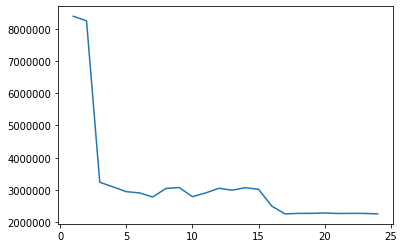

In [105]:
## 선택 변수에 따른 cross validation score를 시각화해봅니다.
plt.plot(selected_varnum, score_list)

In [48]:
## 최적이라고 나온 17개의 변수를 선택해 모델을 학습하고 예측해 제출파일로 저장합니다.
input_var = imp_df['var'].iloc[:17].tolist()
xgb.fit(train[input_var],
        train['Sales'])

test['Sales'] = xgb.predict(test[input_var])

test[['id','Sales']].to_csv("submission2.csv",index=False)

# 7. 파라미터 튜닝

In [39]:
## n_estimators 파라미터를 최적화시키는 작업을 진행합니다.
estim_list = [100,200,300,400,500,600,700,800,900]
score_list = []

In [42]:
for i in estim_list:
    xgb = XGBRegressor( n_estimators=i, learning_rate= 0.1, random_state=2020)
    scores = cross_val_score(xgb, train[input_var], train['Sales'], scoring="neg_mean_squared_error", cv=3)
    score_list.append(-np.mean(scores))
    print(i)

100
200
300
400
500
600
700
800
900


(array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 11 Text xticklabel objects>)

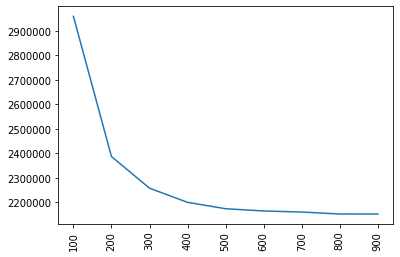

In [43]:
plt.plot(estim_list,score_list)
plt.xticks(rotation=90)

In [44]:
xgb = XGBRegressor( n_estimators=600, learning_rate= 0.1, random_state=2020)

In [45]:
xgb.fit(train[input_var],
        train['Sales'])

test['Sales'] = xgb.predict(test[input_var])

test[['id','Sales']].to_csv("submission3.csv",index=False)